### Titanic disaster 

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [26]:
df = pd.read_csv("Datasets/ML_Titanic_dataset.csv")

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [29]:
df.shape

(891, 12)

In [30]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
df.drop("Cabin", axis =1, inplace=True)

In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Class analysis

In [45]:
p_class_df = df.groupby("Pclass")["PassengerId"].count().to_frame(name = "count")

In [46]:
p_class_df.head()

,count
Pclass,
1,216
2,184
3,491


<AxesSubplot:xlabel='Pclass'>

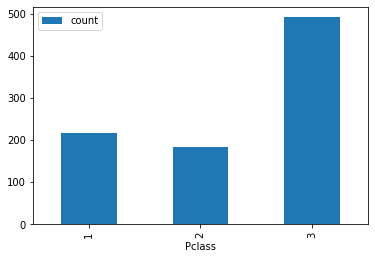

In [47]:
p_class_df.plot(kind="bar")

<AxesSubplot:xlabel='Pclass'>

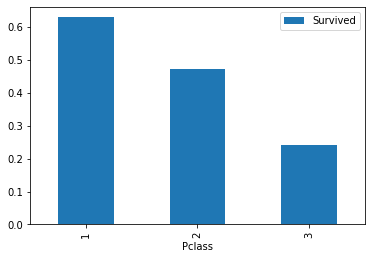

In [51]:
df[["Survived", "Pclass"]].groupby("Pclass").mean().plot(kind="bar")

### Gender analysis

In [58]:
df["Sex"].nunique()

2

<AxesSubplot:xlabel='Sex'>

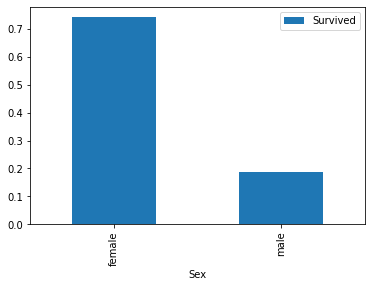

In [64]:
df[["Survived", "Sex"]].groupby("Sex").mean().plot(kind="bar")

In [70]:
survived_df = df[["Survived", "Sex"]].groupby("Sex").sum()

In [79]:
survived_df["Total"] = df[["Survived", "Sex"]].groupby("Sex").count()

<AxesSubplot:xlabel='Sex'>

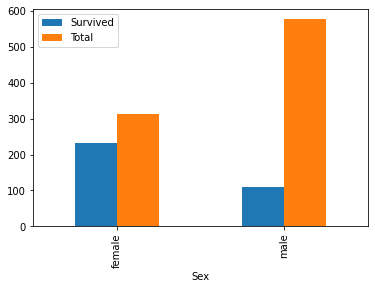

In [80]:
survived_df.plot(kind="bar")

In [82]:
children_df = df[df["Age"] < 18]  

In [88]:
children_df.shape[0] ###How many children were there in the Titanic?

113

In [91]:
children_df["Survived"].sum()  ### How many children survived?

61

In [106]:
survived_df.loc["children"] = children_df["Survived"].sum() ,  children_df.shape[0]

In [107]:
survived_df

,Survived,Total
Sex,,
female,233,314
male,109,577
children,61,113


In [108]:
children_gen_df = children_df[["Sex", "Survived"]].groupby("Sex").sum()

In [109]:
children_gen_df["Total"] = children_df[["Sex", "Survived"]].groupby("Sex").count()

In [110]:
children_gen_df.loc["children"] = [0,0]

In [113]:
survivors = (survived_df - children_gen_df)

<AxesSubplot:xlabel='Sex'>

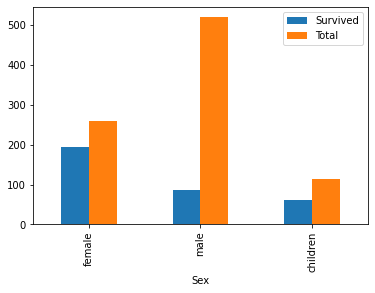

In [115]:
survivors.plot(kind="bar")